<a href="https://colab.research.google.com/github/Vnnie-Mun/AI-ML_full-projects_repository/blob/main/MNIST_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import the dependancies


In [30]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

Loading the MNIST data from keras datasets

In [31]:
(X_train,Y_train), (X_test,Y_test) = mnist.load_data()

In [32]:
#shape of the array
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


training data = 60,000 i mages


Test data = 10,000 images




dimention --> 28 x  28


Grayscale --> 1

In [33]:
 print(X_train[10].shape)

(28, 28)


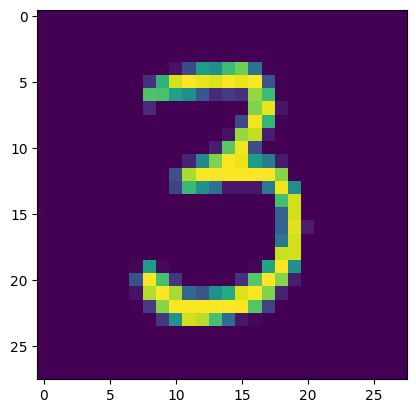

2


In [34]:
#displaying the image
plt.imshow(X_train[50])
plt.show()


#print the corresponding label
print(Y_train[25])

In [35]:
print(Y_train.shape, Y_test.shape)

(60000,) (10000,)


In [36]:
#unique values in Y_train
print(np.unique(Y_train))

#unique values in Y_test
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


All the images have the same dimentions in this dataset,if not ,we have to resize all the images to a common column


(we can use labels as such or we can apply one hot Encoding)}

In [37]:
#scaling the vlues

X_train = X_train/255
X_test = X_test/255

In [38]:
print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Building the neural network

In [39]:
#setting up the layers of the nural network

model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(50, activation = 'relu'),
    keras.layers.Dense(50, activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [40]:
#compiling the neural network
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [41]:
#training the Neural Network
model.fit(X_train,Y_train,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.8492 - loss: 0.5176
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9556 - loss: 0.1491
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9690 - loss: 0.1044
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9768 - loss: 0.0799
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9811 - loss: 0.0642
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9837 - loss: 0.0544
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9862 - loss: 0.0460
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9886 - loss: 0.0397
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9897 - loss: 0.0340
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9909 - loss: 0.0293


Training data accuraacy= 99.01%

Accuracy on test data:

In [42]:
loss,accuracy = model.evaluate(X_test,Y_test)
print(accuracy)
print(loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9683 - loss: 0.1393
0.9711999893188477
0.1238260343670845


Test data accuracy = 96.75%



In [43]:
print(X_test.shape)

(10000, 28, 28)


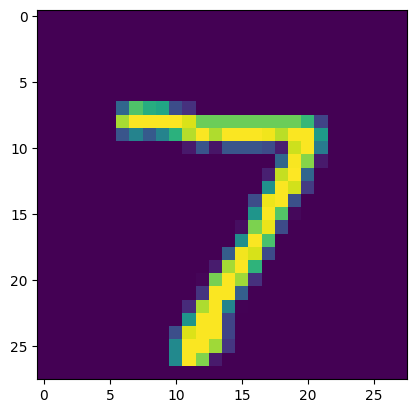

In [44]:
#first data point in X_test
plt.imshow(X_test[0])
plt.show()

In [45]:
print(Y_test[0])

7


In [46]:
Y_pred = model.predict(X_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [29]:
print(Y_pred.shape)

(10000, 10)


In [28]:
print(Y_pred)

[[7.33885997e-07 1.24214348e-04 2.13894434e-02 ... 9.99999821e-01
  5.65429078e-03 8.38702559e-01]
 [3.13916430e-02 4.35554415e-01 9.99999404e-01 ... 7.48982472e-07
  1.68422703e-02 4.52518485e-08]
 [2.74727965e-04 9.99616265e-01 1.90489497e-02 ... 6.64644897e-01
  1.33264795e-01 7.33703934e-03]
 ...
 [8.04444245e-09 2.72983161e-05 5.03450394e-07 ... 9.80802238e-01
  3.82929516e-04 6.89154923e-01]
 [1.35383771e-05 8.12460639e-05 1.14883846e-06 ... 3.56583216e-04
  1.43001033e-02 1.09516426e-04]
 [1.67292281e-04 6.71401858e-06 2.76611445e-07 ... 2.75327990e-11
  4.63988872e-05 5.05574681e-05]]
[[7.33885997e-07 1.24214348e-04 2.13894434e-02 ... 9.99999821e-01
  5.65429078e-03 8.38702559e-01]
 [3.13916430e-02 4.35554415e-01 9.99999404e-01 ... 7.48982472e-07
  1.68422703e-02 4.52518485e-08]
 [2.74727965e-04 9.99616265e-01 1.90489497e-02 ... 6.64644897e-01
  1.33264795e-01 7.33703934e-03]
 ...
 [8.04444245e-09 2.72983161e-05 5.03450394e-07 ... 9.80802238e-01
  3.82929516e-04 6.89154923e-01]

model.predict()  gives the prediction probability of each class for that data point

In [27]:
#converting the prediction probabilities to the class label

label_for_first_image = np.argmax(Y_pred[0])

print(label_for_first_image)


7


In [48]:
#converting the prediction probabilities to class label for all test datapoints

Y_pred_labels =  [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4), np.int64(1), np.int64(4), np.int64(9), np.int64(5), np.int64(9), np.int64(0), np.int64(6), np.int64(9), np.int64(0), np.int64(1), np.int64(5), np.int64(9), np.int64(7), np.int64(8), np.int64(4), np.int64(9), np.int64(6), np.int64(6), np.int64(5), np.int64(4), np.int64(0), np.int64(7), np.int64(4), np.int64(0), np.int64(1), np.int64(3), np.int64(1), np.int64(3), np.int64(4), np.int64(7), np.int64(2), np.int64(7), np.int64(1), np.int64(2), np.int64(1), np.int64(1), np.int64(7), np.int64(4), np.int64(2), np.int64(3), np.int64(5), np.int64(1), np.int64(2), np.int64(4), np.int64(4), np.int64(6), np.int64(3), np.int64(5), np.int64(5), np.int64(6), np.int64(0), np.int64(4), np.int64(1), np.int64(9), np.int64(5), np.int64(7), np.int64(8), np.int64(9), np.int64(3), np.int64(7), np.int64(4), np.int64(6), np.int64(4), np.int64(3), np.int64(0), np.int64(7), np.int64(0), np.int64(2), np.int64(9), np.int64(1), np.int64(7), np.int64(3)

Y_test --> True labels


Y_pred_labels ---> predict

Confusion Matrix


In [49]:
conf_mat = confusion_matrix(Y_test, Y_pred_labels)

print(conf_mat)

tf.Tensor(
[[ 964    0    2    2    1    2    3    1    1    4]
 [   2 1117    2    5    0    1    2    2    4    0]
 [   2    3  994    9    4    1    3    8    6    2]
 [   0    0    5  982    0    6    0    5    5    7]
 [   1    0    3    0  965    0    4    1    2    6]
 [   3    0    0   16    1  865    2    0    2    3]
 [   2    2    1    2    6   12  933    0    0    0]
 [   1    2    9    5    2    0    2  989    2   16]
 [   3    0    4   10    4   10    2    2  925   14]
 [   1    2    1    3   20    3    0    1    1  977]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Values')

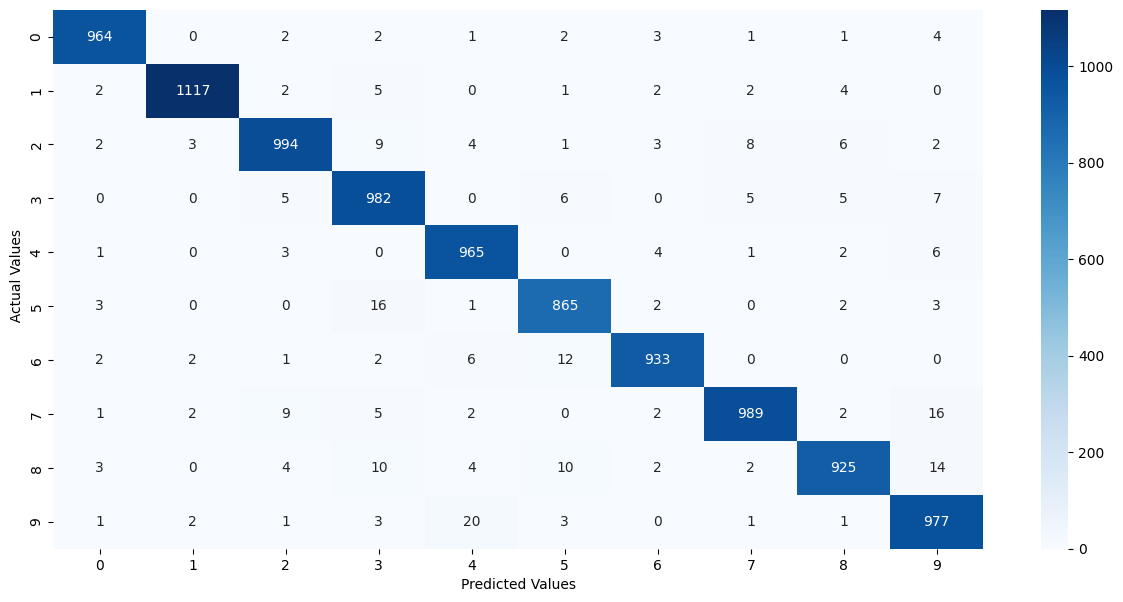

In [50]:
plt.figure(figsize = (15, 7))
sns.heatmap(conf_mat, annot=True, fmt = 'd', cmap='Blues')
plt.ylabel('  Actual Values')
plt.xlabel('Predicted Values')

Building a predictive system

In [51]:
input_image_path = '/content/MNIST_digit.png'

In [52]:
input_image = cv2.imread(input_image_path)

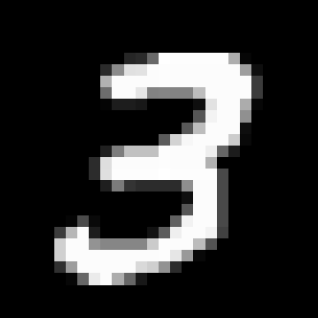

In [54]:
cv2_imshow(input_image)

In [56]:
input_image.shape

(318, 318, 3)

In [57]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [58]:
grayscale.shape

(318, 318)

In [59]:
input_image_resize = cv2.resize(grayscale, (28,28))

In [60]:
input_image_resize.shape

(28, 28)

In [62]:
cv2_imshow(input_image_resize)

In [63]:
input_image_resize = input_image_resize/255

In [64]:
type(input_image_resize)

numpy.ndarray

In [65]:
image_reshaped = np.reshape(input_image_resize, [1,28,28])

In [67]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
[[7.9077737e-11 5.5067684e-04 3.2762207e-02 1.0000000e+00 2.5516448e-07
  9.2830628e-01 5.3086799e-13 1.7125510e-06 9.3609118e-01 9.7209901e-01]]


In [69]:
input_pred_label = np.argmax(input_prediction)
print(input_pred_label)

3


Predictive system

Path of the image to be predicted/content/MNIST_digit.png


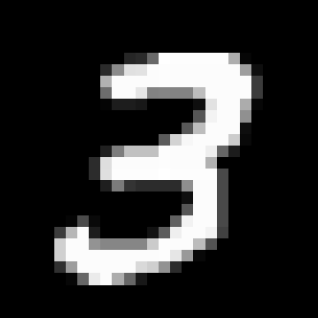

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
The Handwritten Digit is recognised as  3


In [72]:
input_image_path = input('Path of the image to be predicted')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale, (28,28))

input_image_resize = input_image_resize/255

image_reshaped = np.reshape(input_image_resize, [1,28,28])

input_prediction = model.predict(image_reshaped)

input_pre_label = np.argmax(input_prediction)

print('The Handwritten Digit is recognised as ', input_pre_label)